In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# PatientInfo = pd.read_csv('/Users/yunsujin/likelion_AI/데이터/archive (1) 2/PatientInfo.csv')
PatientInfo=pd.read_csv("/content/drive/MyDrive/코로나 데이터 분석 과제/coronavirusdataset_20200430/PatientInfo.csv")
# PatientInfo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
covid_confirmed_released = PatientInfo[['sex','confirmed_date', 'released_date']]  # 성별과 확진일, 퇴원일만 추출
covid_confirmed_released = covid_confirmed_released.dropna()  # 순수히 회복 기간을 추출하기 위해 결측치는 제거

In [ ]:
# (퇴원일 - 확진일) 계산하여 회복 기간 산출.

confirmed = pd.to_datetime(covid_confirmed_released['confirmed_date']) 
released = pd.to_datetime(covid_confirmed_released['released_date'])
recovered = (released - confirmed).dt.days

In [ ]:
covid_confirmed_released['recovered_date'] = recovered # 회복 기간 추가
sex_recovered = covid_confirmed_released[['sex', 'recovered_date']] # 성별 회복 기간
mean = sex_recovered.groupby(sex_recovered['sex']).mean() # 성별 평균 회복 기간

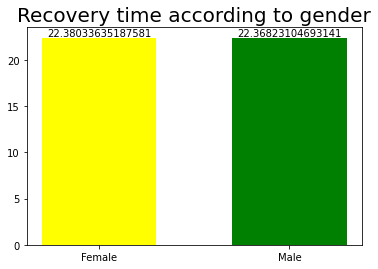

In [ ]:
x = ['Female', 'Male']
y = mean['recovered_date']
plt.bar(x, y, color = ['yellow', 'green'], align = 'center', width = 0.6)
plt.title("Recovery time according to gender", size = 20)
for i, v in enumerate(x):
    plt.text(v, y[i], y[i],                 # 좌표 (x축 = v, y축 = y[0]..y[1], 표시 = y[0]..y[1])
             fontsize = 10, 
             color='black',
             horizontalalignment='center',  # horizontalalignment (left, center, right)
             verticalalignment='bottom')    # verticalalignment (top, center, bottom)

plt.show()